# Diabetes Prediction


# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [2]:
dataset = pd.read_csv('Heart_Disease_Prediction.csv')
X = dataset.iloc[:, :-1].values # Exclude the first column as it was not related to prediction
y = dataset.iloc[:, -1].values

In [3]:
print(X[:5])

[[7.00e+01 1.00e+00 4.00e+00 1.30e+02 3.22e+02 0.00e+00 2.00e+00 1.09e+02
  0.00e+00 2.40e+00 2.00e+00 3.00e+00 3.00e+00]
 [6.70e+01 0.00e+00 3.00e+00 1.15e+02 5.64e+02 0.00e+00 2.00e+00 1.60e+02
  0.00e+00 1.60e+00 2.00e+00 0.00e+00 7.00e+00]
 [5.70e+01 1.00e+00 2.00e+00 1.24e+02 2.61e+02 0.00e+00 0.00e+00 1.41e+02
  0.00e+00 3.00e-01 1.00e+00 0.00e+00 7.00e+00]
 [6.40e+01 1.00e+00 4.00e+00 1.28e+02 2.63e+02 0.00e+00 0.00e+00 1.05e+02
  1.00e+00 2.00e-01 2.00e+00 1.00e+00 7.00e+00]
 [7.40e+01 0.00e+00 2.00e+00 1.20e+02 2.69e+02 0.00e+00 2.00e+00 1.21e+02
  1.00e+00 2.00e-01 1.00e+00 1.00e+00 3.00e+00]]


In [4]:
print(y[:5])

['Presence' 'Absence' 'Presence' 'Absence' 'Absence']


In [5]:
dataset.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
print(y[:10])

[1 0 1 0 0 0 1 1 1 1]


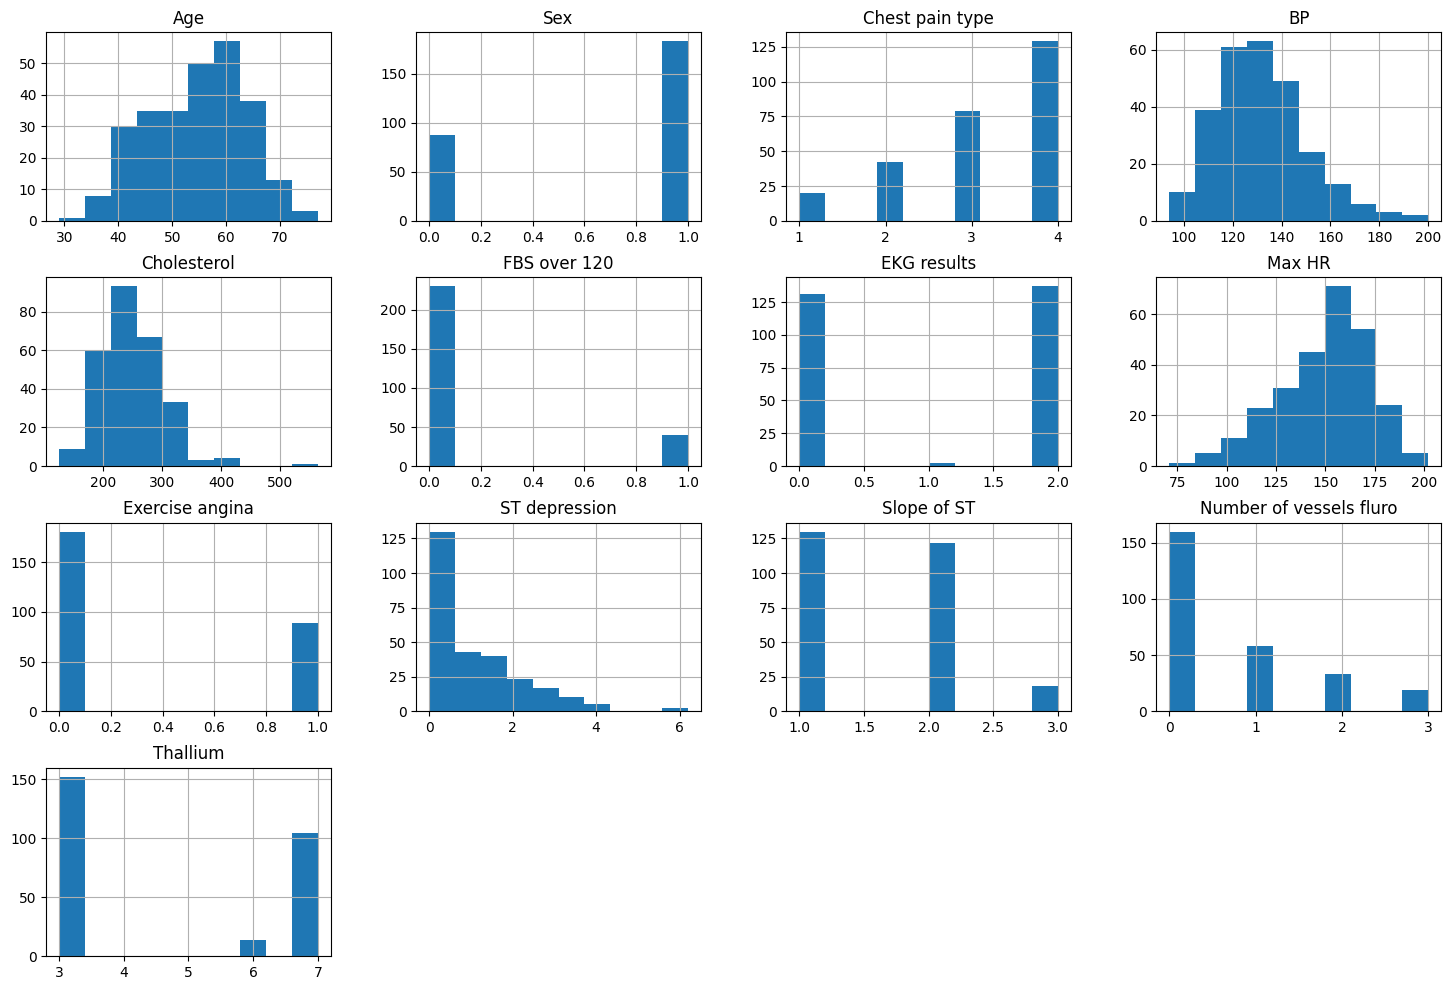

In [8]:
dataset.hist(figsize=(18,12))
plt.show()

# Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training Decision Tree Classifier Model on Training Dataset

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train , y_train)

DecisionTreeClassifier()

In [12]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

# Creating Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : - ')
print(cm)

Confusion Matrix : - 
[[25  5]
 [ 4 20]]


# Computing Accuracy with K-cross fold validation

In [14]:
from sklearn.model_selection import cross_val_score
accuracy2 = cross_val_score(estimator = classifier ,X = X_train ,y = y_train , cv = 10)
print("Training Score = " + f"{accuracy2.mean()*100}")
print("Standard Deviation = " + f"{accuracy2.std()*100}")

Training Score = 80.62770562770562
Standard Deviation = 5.132426710553842


In [15]:
from sklearn.metrics import accuracy_score
print("Acurracy =",accuracy_score(y_test,y_pred)*100 , '%')

Acurracy = 83.33333333333334 %
